In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
#Import qutip
from qutip import *

# 2.1

## a)
#### $\sigma$ = ($\sigma_x, \sigma_y, \sigma_z$)

#### $\sigma$ = ($\begin{bmatrix} 0 & 1 \\\\ 1 & 0 \end{bmatrix}$, $\begin{bmatrix} 0 & i \\\\ -i & 0 \end{bmatrix}$, $\begin{bmatrix} 1 & 0 \\\\ 0 & -1 \end{bmatrix}$)

## b)
#### i)
 - $\langle \sigma \rangle$ = ($\langle 0 \rangle, \langle 0 \rangle, \langle 1 \rangle$)
#### ii)
 - $\langle \sigma \rangle$ = ($\langle 1 \rangle, \langle 0 \rangle, \langle 0 \rangle$)
#### iii)
 - $\langle \sigma \rangle$ = ($\langle 1/\sqrt{2} \rangle, \langle 1/\sqrt{2} \rangle, \langle 0 \rangle$)

i)



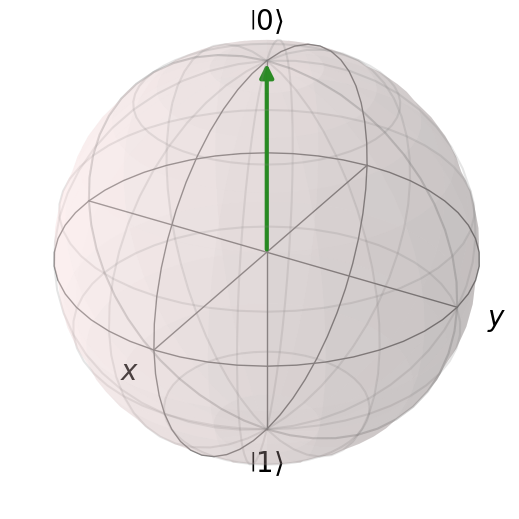

In [2]:
print("i)\n")

psi = basis(2,0)

b = Bloch()

b.add_states(psi)

b.show()

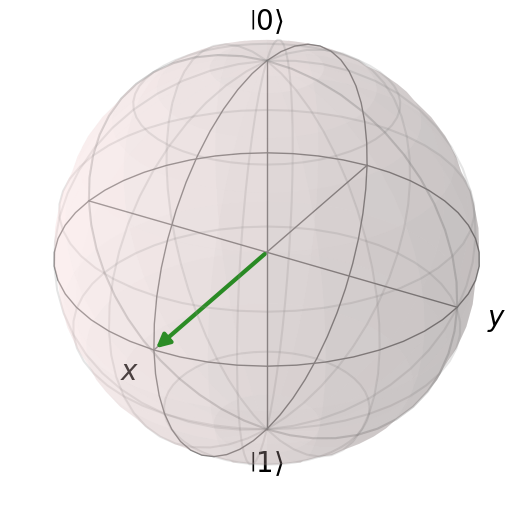

In [3]:
b.clear()

psi = ((basis(2,0) + basis(2,1)) / math.sqrt(2))

b.add_states(psi)

b.show()

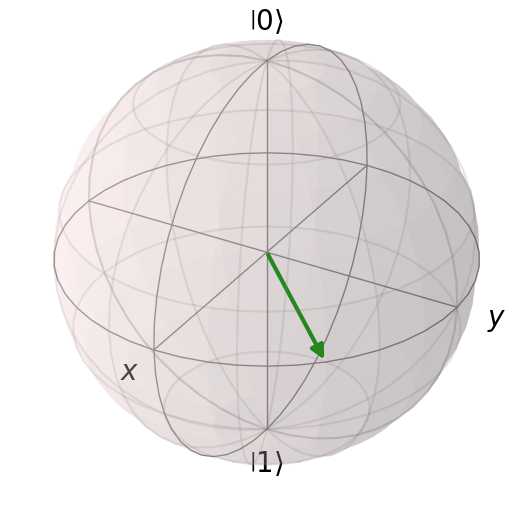

In [4]:
b.clear()

psi = (((1/math.sqrt(2)) * basis(2,0)) + (1/2) * (1 + 1j) * basis(2,1))

b.add_states(psi)

b.show()

#### $\ket{+x},  -\frac{g\mu_B B_x}{2}$

#### $\ket{-x},  \frac{g\mu_B B_x}{2}$

In [5]:
sigmax = np.array([[0, 1], [1, 0]], dtype=complex)

H = -140 * sigmax

evals, evecs = np.linalg.eigh(H)

print("Eigenvalues (MHz):", evals)
print("Eigenvectors:\n", evecs)

Eigenvalues (MHz): [-140.  140.]
Eigenvectors:
 [[-0.70710678+0.j -0.70710678+0.j]
 [-0.70710678+0.j  0.70710678+0.j]]


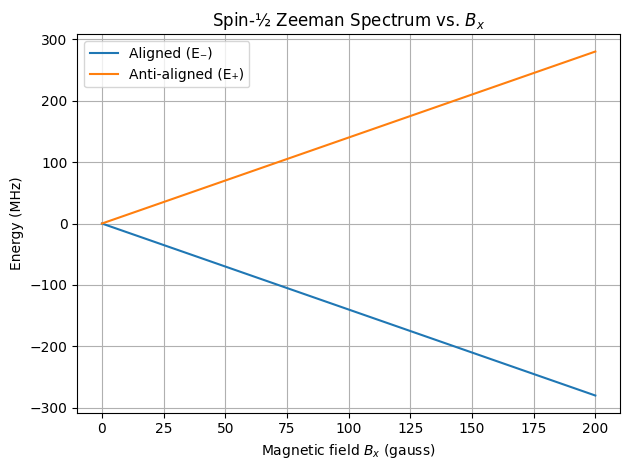

In [6]:
# Varaiables
g = 2.0
mu_B = 1.4
Bx_vals = np.linspace(0, 200, 201)

energies_plus = []
energies_minus = []

for Bx in Bx_vals:
        H = -0.5 * g * mu_B * Bx * gates.sigmax()   # MHz
        evals = H.eigenenergies()
        energies_minus.append(evals[0])   # lower (aligned) level
        energies_plus.append(evals[1])    # higher (anti‑aligned) level

# Convert lists to arrays for plotting
energies_minus = np.array(energies_minus)
energies_plus  = np.array(energies_plus)

# Plot
plt.figure()
plt.plot(Bx_vals, energies_minus, label="Aligned (E₋)")
plt.plot(Bx_vals, energies_plus, label="Anti‑aligned (E₊)")
plt.xlabel("Magnetic field $B_x$ (gauss)")
plt.ylabel("Energy (MHz)")
plt.title("Spin‑½ Zeeman Spectrum vs. $B_x$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3.2

### 3.2.1 - 0-1 Rabi Oscillations

#### This Exercise is used to test the laser that will transistion the qubit from $\ket{0}$ to $\ket{1}$ using a rabi frequency of 1

- Tests the qubit rotation dynamics for basic X gate-like control.

- Confirms the simulator handles coherent control over qubit subspace.

In [ ]:
rho0 = basis(4,0)

zero = basis(4,0)
one = basis(4,1)
r = basis(4,2)
d = basis(4,3)

omega_01 = 1 #MHz
delta_1 = 0
omega_r = 0
Delta_r = 0

gamma_r = 1/5 #µs
branch_0r = 1/16
branch_1r = 1/16
branch_dr = 7/8

H = ((omega_01 / 2) * ((zero * one.dag()) + (one * zero.dag()))) + (delta_1 * one * one.dag()) + ((omega_r / 2) * ((one * r.dag()) + (r * one.dag())) + (Delta_r * r * r.dag()))

P0 = zero * zero.dag()
P1 = one * one.dag()
Pr = r * r.dag()
Pd = d * d.dag()

L0 = np.sqrt(branch_0r * gamma_r) * (zero * r.dag())
L1 = np.sqrt(branch_1r * gamma_r) * (one * r.dag())
Ld = np.sqrt(branch_dr * gamma_r) * (d * r.dag())

c_ops = [L0, L1, Ld]

tlist = np.linspace(0.0, 20.0, 2001)

result = mesolve(H, rho0, tlist, c_ops, e_ops=[P0, P1, Pr, Pd])

P0_t, P1_t, Pr_t, Pd_t = result.expect

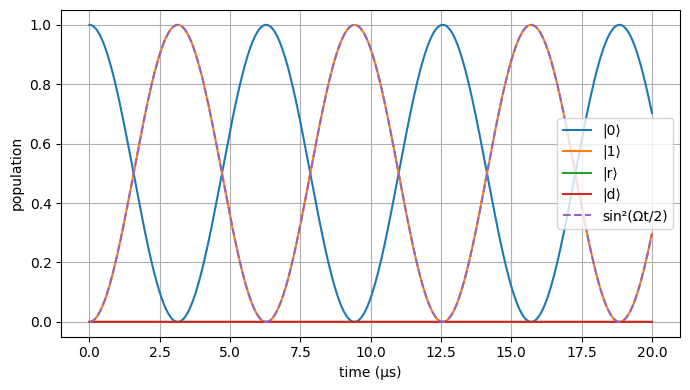

In [ ]:
plt.figure(figsize=(7,4)) 

plt.plot(tlist, P0_t, label='|0⟩')
plt.plot(tlist, P1_t, label='|1⟩')
plt.plot(tlist, Pr_t, label='|r⟩')
plt.plot(tlist, Pd_t, label='|d⟩')

plt.plot(tlist, np.sin(0.5*omega_01*tlist)**2,
         '--',  label='sin²(Ωt/2)')

plt.xlabel('time (µs)')
plt.ylabel('population')
plt.ylim(-0.05, 1.05)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.2.2 - Rydberg state lifetime


#### This exercise tests and shows the decay of the qubit when in the rydberg state $\ket{r}$ via the linbald master equation's evolution

- Validates the dissipative physics in the model.

- Essential for error modeling, decoherence studies, and lifetime estimates.

In [33]:
rho0 = basis(4,2)

zero = basis(4,0)
one = basis(4,1)
r = basis(4,2)
d = basis(4,3)

omega_01 = 0 #MHz
delta_1 = 0
omega_r = 0
Delta_r = 0
gamma_r = 1/5 #µs
branch_0r = 1/16
branch_1r = 1/16
branch_dr = 7/8

H = ((omega_01 / 2) * ((zero * one.dag()) + (one * zero.dag()))) + (delta_1 * one * one.dag()) + ((omega_r / 2) * ((one * r.dag()) + (r * one.dag())) + (Delta_r * r * r.dag()))

P0 = zero * zero.dag()
P1 = one * one.dag()
Pr = r * r.dag()
Pd = d * d.dag()

L0 = np.sqrt(branch_0r * gamma_r) * (zero * r.dag())
L1 = np.sqrt(branch_1r * gamma_r) * (one * r.dag())
Ld = np.sqrt(branch_dr * gamma_r) * (d * r.dag())

c_ops = [L0, L1, Ld]

tlist = np.linspace(0.0, 10.0, 2001)

result = mesolve(H, rho0, tlist, c_ops, e_ops=[P0, P1, Pr, Pd])

P0_t, P1_t, Pr_t, Pd_t = result.expect

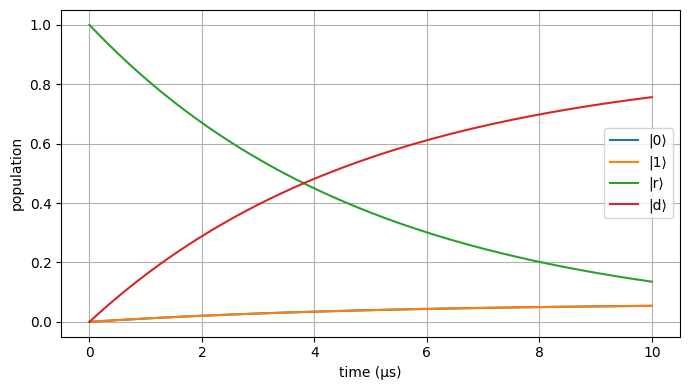

In [ ]:
plt.figure(figsize=(7,4)) 

plt.plot(tlist, P0_t, label='|0⟩')
plt.plot(tlist, P1_t, label='|1⟩')
plt.plot(tlist, Pr_t, label='|r⟩')
plt.plot(tlist, Pd_t, label='|d⟩')


plt.xlabel('time (µs)')
plt.ylabel('population')
plt.ylim(-0.05, 1.05)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.2.3 - 0-r Rabi Oscillations

#### tests the laser that drives the transistion from $\ket{1}$ to $\ket{r}$

- Tests excitation to and decay from Rydberg states.

- This is key to implementing two-qubit gates via the Rydberg blockade.

In [31]:
rho0 = basis(4,1)

zero = basis(4,0)
one = basis(4,1)
r = basis(4,2)
d = basis(4,3)

omega_01 = 0 #MHz
delta_1 = 0
omega_r = 10 #MHz
Delta_r = 0
gamma_r = 1/5 #µs
branch_0r = 1/16
branch_1r = 1/16
branch_dr = 7/8

H = ((omega_01 / 2) * ((zero * one.dag()) + (one * zero.dag()))) + (delta_1 * one * one.dag()) + ((omega_r / 2) * ((one * r.dag()) + (r * one.dag())) + (Delta_r * r * r.dag()))

P0 = zero * zero.dag()
P1 = one * one.dag()
Pr = r * r.dag()
Pd = d * d.dag()

L0 = np.sqrt(branch_0r * gamma_r) * (zero * r.dag())
L1 = np.sqrt(branch_1r * gamma_r) * (one * r.dag())
Ld = np.sqrt(branch_dr * gamma_r) * (d * r.dag())

c_ops = [L0, L1, Ld]

tlist = np.linspace(0.0, 50.0, 2001)

result = mesolve(H, rho0, tlist, c_ops, e_ops=[P0, P1, Pr, Pd])

P0_t, P1_t, Pr_t, Pd_t = result.expect

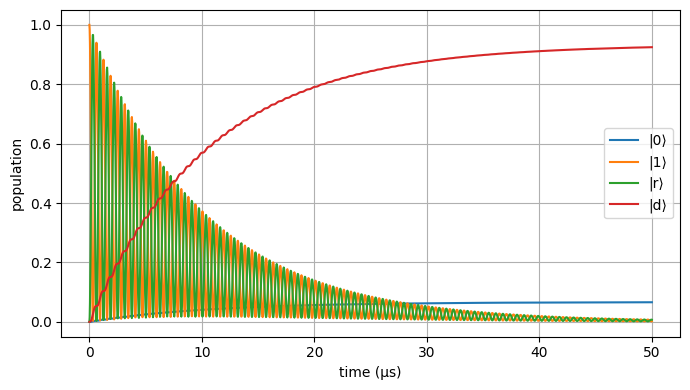

In [ ]:
plt.figure(figsize=(7,4)) 

plt.plot(tlist, P0_t, label='|0⟩')
plt.plot(tlist, P1_t, label='|1⟩')
plt.plot(tlist, Pr_t, label='|r⟩')
plt.plot(tlist, Pd_t, label='|d⟩')


plt.xlabel('time (µs)')
plt.ylabel('population')
plt.ylim(-0.05, 1.05)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

##### gamma is gamma_r, aka 1/(5µs)

### 3.2.4 - 0-1 Detuned Rabi Oscillations

#### tests detuning of the laser that drives the $\ket{0}$ to $\ket{1}$ transition. Detuning slows down the Rabi oscillations and reduces amplitude

- Shows how laser detuning affects qubit dynamics.

- Important for implementing precise control (e.g., detuned gates or avoiding unwanted transitions).

In [4]:
rho0 = basis(4,0)

zero = basis(4,0)
one = basis(4,1)
r = basis(4,2)
d = basis(4,3)

omega_01 = 1 #MHz
delta_1 = 1
omega_r = 0 #MHz
Delta_r = 0
gamma_r = 1/5 #µs
branch_0r = 1/16
branch_1r = 1/16
branch_dr = 7/8

H = ((omega_01 / 2) * ((zero * one.dag()) + (one * zero.dag()))) + (delta_1 * one * one.dag()) + ((omega_r / 2) * ((one * r.dag()) + (r * one.dag())) + (Delta_r * r * r.dag()))

P0 = zero * zero.dag()
P1 = one * one.dag()
Pr = r * r.dag()
Pd = d * d.dag()
X01 = zero * one.dag() + one * zero.dag()

L0 = np.sqrt(branch_0r * gamma_r) * (zero * r.dag())
L1 = np.sqrt(branch_1r * gamma_r) * (one * r.dag())
Ld = np.sqrt(branch_dr * gamma_r) * (d * r.dag())

c_ops = [L0, L1, Ld]

tlist = np.linspace(0.0, 50.0, 2001)

result = mesolve(H, rho0, tlist, c_ops, e_ops=[P0, P1, Pr, Pd, X01])

P0_t, P1_t, Pr_t, Pd_t, coh_t = result.expect

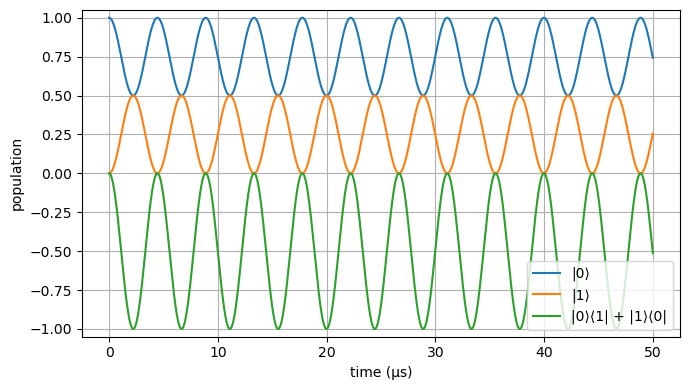

In [5]:
plt.figure(figsize=(7,4)) 

plt.plot(tlist, P0_t, label='|0⟩')
plt.plot(tlist, P1_t, label='|1⟩')
plt.plot(tlist, coh_t, label='|0⟩⟨1| + |1⟩⟨0|')


plt.xlabel('time (µs)')
plt.ylabel('population')
plt.ylim(-1.05, 1.05)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3.4

### 3.4.1 - Rydberg Blockade

#### This exercise has two atoms each with its own four level structure, but only atom 0 is driven on the $\ket{1}$ to $\ket{r}$ transition. Plotting both the $\ket{10}$ and $\ket{1r}$ states

#### When B = 0: Atom 0 evolves as if atom 1 isn't there → no blockade.

#### When B > 0: |rr⟩ is energetically penalized, reducing the probability of atom 0 reaching |r⟩ if atom 1 is already in |r⟩. Leads to suppression of double excitation (Rydberg blockade). Strong blockade (e.g., 400 MHz) = better isolation → essential for CZ or CNOT gates.

- Demonstrates entangling capability of neutral atom platforms.

- The blockade is the mechanism behind many two-qubit gates in real neutral atom systems.

- Critical for simulating multi-qubit logic and understanding the limits of scalability.

In [14]:
rho0 = tensor(basis(4,1), basis(4,2))

zero = basis(4,0)
one = basis(4,1)
r = basis(4,2)
d = basis(4,3)

S01  = zero*one.dag() + one*zero.dag()
P1   = one*one.dag()
Sr1  = one*r.dag()    + r*one.dag()
Pr   = r*r.dag()

I4   = qeye(4)


# Atom A (left qubit)
S01_A = tensor(S01, I4)
P1_A  = tensor(P1 , I4)
Sr1_A = tensor(Sr1, I4)
Pr_A  = tensor(Pr , I4)

# Atom B (right qubit)
S01_B = tensor(I4, S01)
P1_B  = tensor(I4, P1 )
Sr1_B = tensor(I4, Sr1)
Pr_B  = tensor(I4, Pr )


Omega_01 = 0 #MHz
delta_1 = 0
Omega_r = 10 #MHz
Delta_r = 0
B = 400 #Mhz

H = (Omega_01/2)*(S01_A + S01_B) \
  + delta_1     *(P1_A  + P1_B ) \
  + (Omega_r/2)*(Sr1_A + Sr1_B) \
  + Delta_r    *(Pr_A  + Pr_B ) \
  + B * tensor(Pr, Pr)  


gamma_r = 1/5 #µs
b_0r = 1/16
b_1r = 1/16
b_dr = 7/8

L0_single = np.sqrt(b_0r * gamma_r) * (zero * r.dag())
L1_single = np.sqrt(b_1r * gamma_r) * (one * r.dag())
Ld_single = np.sqrt(b_dr * gamma_r) * (d * r.dag())

c_ops = [tensor(L0_single, I4), tensor(L1_single, I4), tensor(Ld_single, I4), tensor(I4, L0_single), tensor(I4, L1_single), tensor(I4, Ld_single)]

"""
P0_tot = tensor(zero*zero.dag(), I4) + tensor(I4, zero*zero.dag())
P1_tot = tensor(P1 , I4)            + tensor(I4, P1 )
Pr_tot = tensor(Pr , I4)            + tensor(I4, Pr )
Pd_tot = tensor(d*d.dag(), I4)      + tensor(I4, d*d.dag())

e_ops = [P0_tot, P1_tot, Pr_tot, Pd_tot]
"""

# single-atom projectors
P0_single = zero*zero.dag()
P1_single = one *one.dag()
Pr_single = r   *r.dag()
Pd_single = d   *d.dag()
I4        = qeye(4)

# projectors acting on LEFT (atom-A) only
P0_L = tensor(P0_single, I4)
P1_L = tensor(P1_single, I4)
Pr_L = tensor(Pr_single, I4)
Pd_L = tensor(Pd_single, I4)

e_ops = [P0_L, P1_L, Pr_L, Pd_L]

tlist = np.linspace(0.0, 50.0, 2001)

result = mesolve(H, rho0, tlist, c_ops, e_ops=e_ops)

P0L_t, P1L_t, PrL_t, PdL_t = result.expect

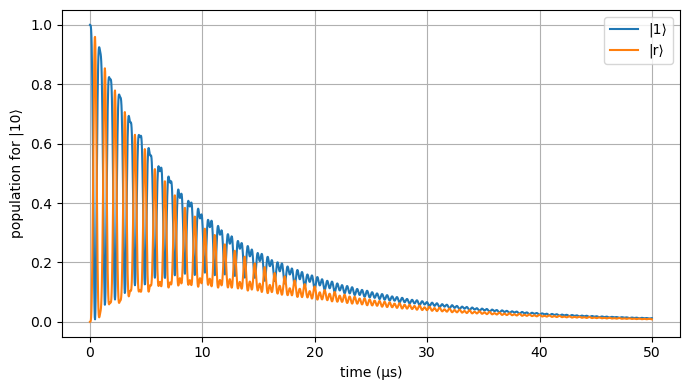

In [16]:
plt.figure(figsize=(7,4)) 

plt.plot(tlist, P1L_t, label='|1⟩')
plt.plot(tlist, PrL_t, label='|r⟩')


plt.xlabel('time (µs)')
plt.ylabel('population for |10⟩')
plt.ylim(-0.05, 1.05)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

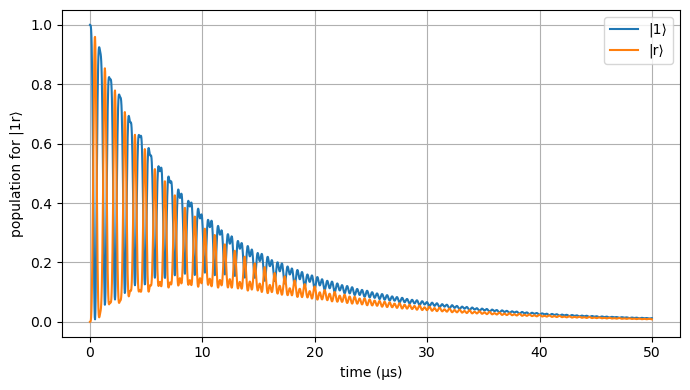

In [17]:
plt.figure(figsize=(7,4)) 

plt.plot(tlist, P1L_t, label='|1⟩')
plt.plot(tlist, PrL_t, label='|r⟩')


plt.xlabel('time (µs)')
plt.ylabel('population for |1r⟩')
plt.ylim(-0.05, 1.05)
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()